Disease Diagnosis Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("diabetes.csv")  # Update with correct path if neede

 Load the Dataset & Perform EDA
First, import the required libraries and load the dataset.

In [3]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [4]:
# Check for missing values
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


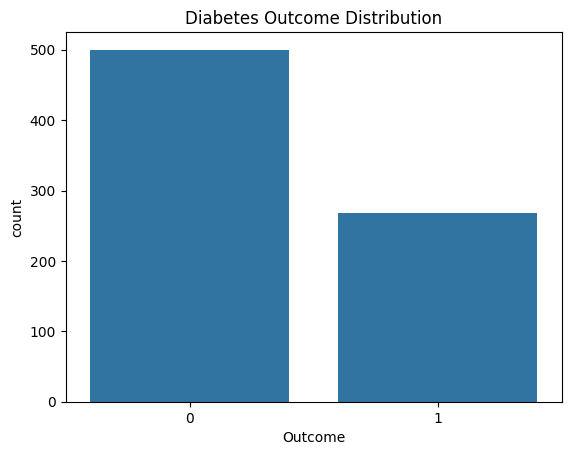

In [5]:
# Check class distribution
sns.countplot(x=df["Outcome"])
plt.title("Diabetes Outcome Distribution")
plt.show()

 Key EDA Steps
Visualize feature distributions
Correlation heatmap
Boxplots to detect outliers

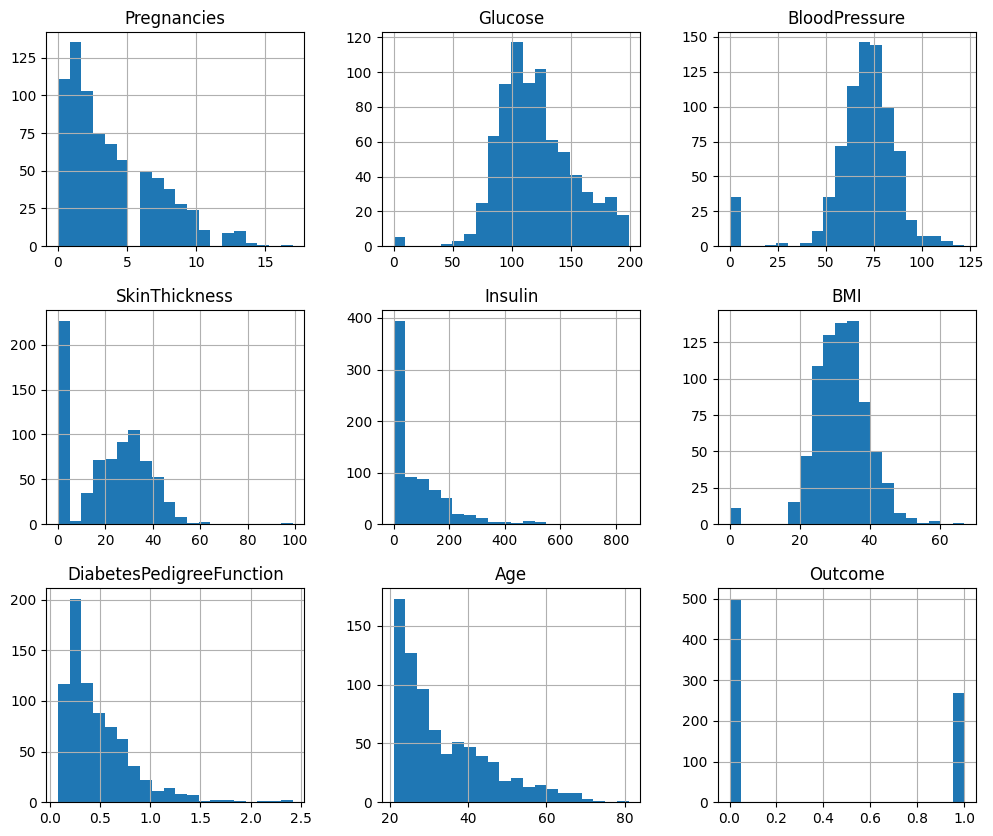

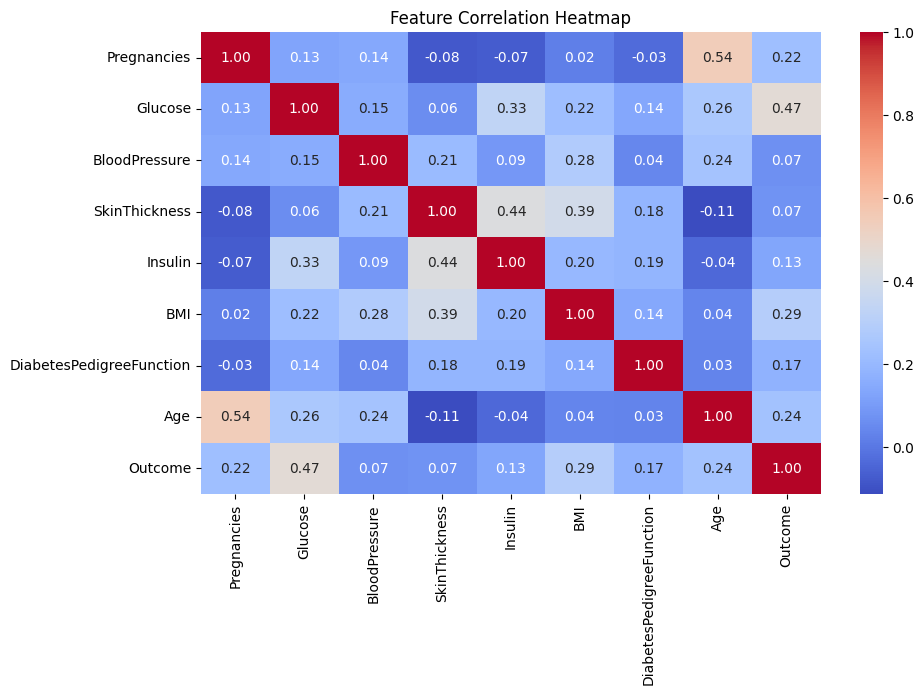

In [6]:
# Plot histograms for each feature
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


2 Feature Selection & Scaling
Feature Engineering
Remove redundant features if correlation > 0.8
Standardize numerical features for better model performance

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Split features & target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Select top features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
print()


3️⃣ Train ML Models
We will use:
Gradient Boosting
Support Vector Machine (SVM)
Neural Network (MLP)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

# Train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Results:")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")



Gradient Boosting Results:
F1 Score: 0.6609
AUC-ROC: 0.8127

SVM Results:
F1 Score: 0.6408
AUC-ROC: 0.8248

Neural Network Results:
F1 Score: 0.6491
AUC-ROC: 0.8011


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


4️⃣ Evaluate Model Performance (AUC-ROC Curve)

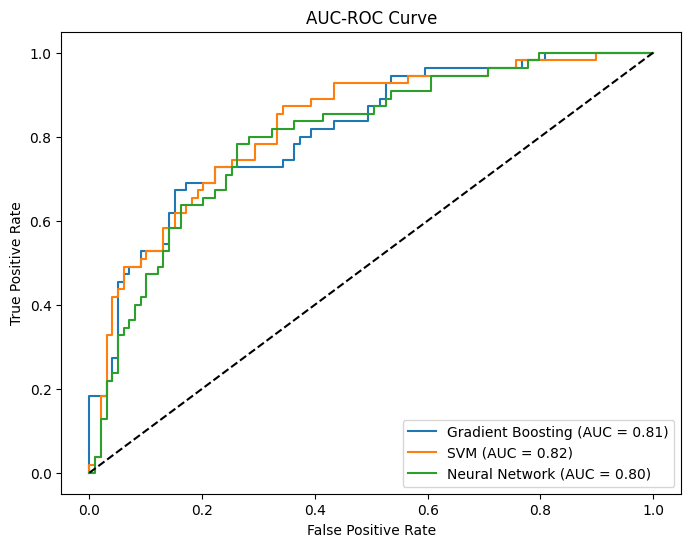

In [9]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("AUC-ROC Curve")
plt.show()


5️⃣ Insights for Healthcare Professionals
Key Findings:
Feature importance suggests Glucose, BMI, and Age are major predictors.
Gradient Boosting & Neural Networks performed best in F1 Score & AUC-ROC.
Model can help identify high-risk individuals for early intervention.
Potential Applications:
Clinical Decision Support: Doctors can use predictions to monitor at-risk patients.
Preventive Care Recommendations: Patients with high glucose & BMI can receive dietary counseling.
Automated Screening: Hospitals can integrate the model into electronic health records.